<a href="https://colab.research.google.com/github/amirohqurrota/song-analysis/blob/main/song-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

%matplotlib inline
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/dataset-ebussines/Dataset2.csv")
df.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [ ]:
df2015=df.loc[(df.Year<=2019) & (df.Year>=2015)]
df2015

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
604,605,The Sound of Silence,Disturbed,alternative metal,2015,86,28,32,-9,10,18,248,47,3,75
605,606,Het Dorp - Live,Wim Sonneveld,dutch cabaret,2015,114,44,37,-15,67,45,198,82,8,15
606,607,Psycho,Muse,modern rock,2015,125,88,56,-3,87,51,317,0,3,69
607,608,Élan,Nightwish,finnish metal,2015,128,58,57,-9,14,30,287,1,3,58
608,609,Dat Ik Je Mis,Maaike Ouboter,dutch pop,2015,174,13,50,-13,10,28,256,88,6,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,795,Blauwe Dag,Suzan & Freek,dutch pop,2019,98,56,70,-7,28,51,183,25,5,68
795,796,Homburg - Single Version - 2009 Remaster - Mono,Procol Harum,album rock,2019,142,66,36,-8,6,38,237,10,3,32
796,797,Uncharted,Kensington,dutch pop,2019,139,53,59,-7,29,23,241,14,3,65
797,798,Despacito,Luis Fonsi,latin,2019,178,80,66,-5,7,84,229,20,15,80


Locator attempting to generate 4347 ticks ([8.040000000000001, ..., 94.96000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4347 ticks ([8.040000000000001, ..., 94.96000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4843 ticks ([7.580000000000001, ..., 104.42]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4843 ticks ([7.580000000000001, ..., 104.42]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4347 ticks ([8.040000000000001, ..., 94.96000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4347 ticks ([8.040000000000001, ..., 94.96000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4843 ticks ([7.580000000000001, ..., 104.42]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4843 ticks ([7.580000000000001, ..., 104.42]), which exceeds Locator.MAXTICKS (1000).
Locator attempting t

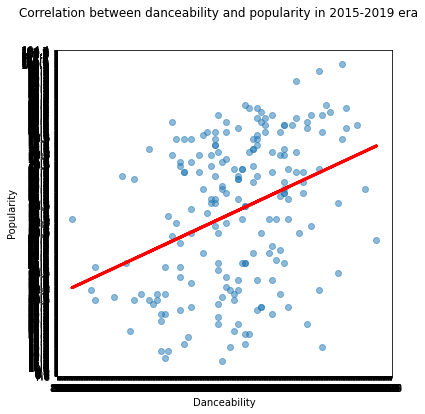

In [ ]:
x = df2015["Danceability"].values
y = df2015["Popularity"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and popularity in 2015-2019 era")

ax = plt.subplot(1, 1, 1)
# z = np.sqrt(x*x+y*y)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Danceability")
plt.ylabel("Popularity")
# plt.colorbar()

plt.show()

In [ ]:
df2015LowDance=df2015.loc[(df2015.Danceability<50)]
df2015LowDance=df2015LowDance.loc[(df2015LowDance.Popularity>=80)]
df2015LowDance

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
743,744,Bad Liar,Imagine Dragons,modern rock,2018,178,64,38,-7,37,8,261,7,7,83
749,750,You Say,Lauren Daigle,ccm,2018,148,63,49,-7,9,8,275,68,3,80
755,756,Faded,Alan Walker,electro house,2018,180,63,47,-5,11,16,212,3,5,80


Locator attempting to generate 1025 ticks ([0.30000000000000004, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1025 ticks ([0.30000000000000004, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1025 ticks ([0.30000000000000004, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5117 ticks ([0.33999999999999997, ..., 102.66000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1025 ticks ([0.30000000000000004, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1025 ticks ([0.30000000000000004, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5117 ticks ([0.33999999999999997, ..., 102.66000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4843 ticks ([7.580000000000001, ..., 104.42]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 

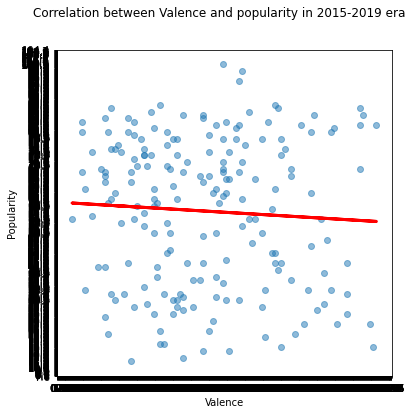

In [ ]:
# df2015=df.loc[(df.Year==2019)]
# df2015.head(5)
x = df2015["Valence"].values
y = df2015["Popularity"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between Valence and popularity in 2015-2019 era")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Valence")
plt.ylabel("Popularity")

plt.show()

In [ ]:
# df2015=df.loc[(df.Year==2019)]
# df2015.head(5)

x = df2015["Valence"].values
y = df2015["Popularity"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between valence and popularity in 2015-2019 era")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Valence")
plt.ylabel("Popularity")

plt.show()

NameError: ignored

In [ ]:
df2000=df.loc[(df.Year>=2000) & (df.Year<2010)]
df2000

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,9 Crimes,Damien Rice,acoustic pop,2006,74,17,33,-13,9,10,219,91,3,57
396,397,Working On a Dream,Bruce Springsteen,classic rock,2009,110,77,56,-7,22,71,209,0,3,48
397,398,Nutbush City Limits,Ike & Tina Turner,brill building pop,2008,77,89,69,-6,3,91,182,9,3,56
398,399,Do They Know It's Christmas? - 1984 Version,Band Aid,electro,2004,115,64,60,-7,10,35,223,16,4,84


Locator attempting to generate 1015 ticks ([1.3, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1015 ticks ([1.3, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1015 ticks ([1.3, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5063 ticks ([1.3800000000000001, ..., 102.62]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1015 ticks ([1.3, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1015 ticks ([1.3, ..., 102.7]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5063 ticks ([1.3800000000000001, ..., 102.62]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3743 ticks ([12.58, ..., 87.42]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3743 ticks ([12.58, ..., 87.42]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1015 ticks ([1.

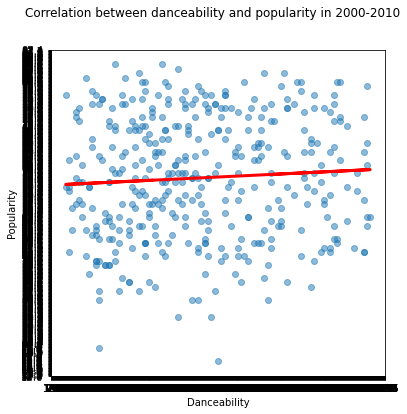

In [ ]:
x = df2000["Valence"].values
y = df2000["Popularity"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and popularity in 2000-2010")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Danceability")
plt.ylabel("Popularity")

plt.show()

In [ ]:
df1990=df.loc[df.Year<2000]
df1990

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
799,800,Child in Time,Deep Purple,album rock,1970,127,46,34,-11,9,35,620,17,4,45
800,801,Let It Be - Remastered 2009,The Beatles,british invasion,1970,143,40,44,-8,11,41,243,63,3,79
801,802,Bridge Over Troubled Water,Simon & Garfunkel,classic rock,1970,80,21,15,-14,12,26,293,82,3,71
802,803,Paranoid - 2016 Remaster,Black Sabbath,album rock,1970,163,66,42,-12,18,45,168,0,7,68
803,804,Have You Ever Seen The Rain,Creedence Clearwater Revival,album rock,1970,116,47,74,-13,19,89,160,9,3,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


Locator attempting to generate 1861 ticks ([28.5, ..., 214.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1861 ticks ([28.5, ..., 214.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1861 ticks ([28.5, ..., 214.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9297 ticks ([28.540000000000003, ..., 214.46]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1861 ticks ([28.5, ..., 214.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1861 ticks ([28.5, ..., 214.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9297 ticks ([28.540000000000003, ..., 214.46]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4623 ticks ([6.78, ..., 99.22]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4623 ticks ([6.78, ..., 99.22]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1861 ticks (

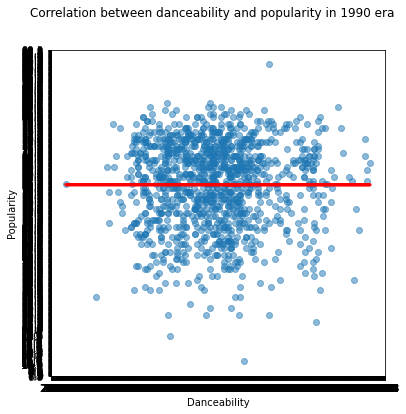

In [ ]:
x = df1990["Beats Per Minute (BPM)"].values
y = df1990["Popularity"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and popularity in 1990 era")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Danceability")
plt.ylabel("Popularity")

plt.show()

In [ ]:
# dfpopular=df.loc[df.Year>2015]
dfpopular=df.loc[df.Popularity>80]
dfpopular=dfpopular.loc[df.Danceability<50]
dfpopular

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
20,21,Fix You,Coldplay,permanent wave,2005,138,42,21,-9,11,12,296,16,3,81
239,240,Yellow,Coldplay,permanent wave,2000,173,66,43,-7,23,28,267,0,3,82
417,418,Christmas Lights,Coldplay,permanent wave,2010,131,42,31,-9,8,24,242,13,3,84
529,530,All of Me,John Legend,neo mellow,2013,120,26,42,-7,13,33,270,92,3,86
591,592,Stay With Me,Sam Smith,pop,2014,84,42,42,-6,11,18,173,59,4,84
743,744,Bad Liar,Imagine Dragons,modern rock,2018,178,64,38,-7,37,8,261,7,7,83
1157,1158,Back In Black,AC/DC,album rock,1980,188,70,31,-6,8,76,255,1,5,83
1452,1453,Fairytale of New York (feat. Kirsty MacColl),The Pogues,celtic punk,1988,119,65,32,-6,24,47,272,50,3,83
1641,1642,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150,63,34,-7,7,35,241,16,4,95


In [ ]:


x = df2015["Danceability"].values
y = df2015["Popularity"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and popularity in 2015-2019 era")

ax = plt.subplot(1, 1, 1)
# z = np.sqrt(x*x+y*y)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Danceability")
plt.ylabel("Popularity")
# plt.colorbar()

plt.show()

**ANALISA KETERKAITAN ANTAR 2 VARIABEL**

Locator attempting to generate 1641 ticks ([41.5, ..., 205.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1641 ticks ([41.5, ..., 205.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8197 ticks ([41.54, ..., 205.46]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1641 ticks ([41.5, ..., 205.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1641 ticks ([41.5, ..., 205.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8197 ticks ([41.54, ..., 205.46]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1641 ticks ([41.5, ..., 205.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1641 ticks ([41.5, ..., 205.5]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 8197 ticks ([41.54, ..., 205.46]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1641 ticks ([41.5, ..., 205.5]), whi

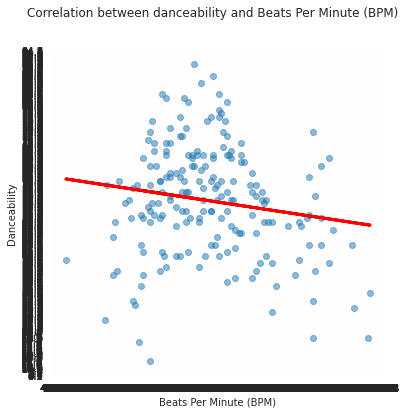

In [ ]:

x = df2015["Beats Per Minute (BPM)"].values
y = df2015["Danceability"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and Beats Per Minute (BPM)")

ax = plt.subplot(1, 1, 1)
# z = np.sqrt(x*x+y*y)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Beats Per Minute (BPM)")
plt.ylabel("Danceability")
# plt.colorbar()

plt.show()

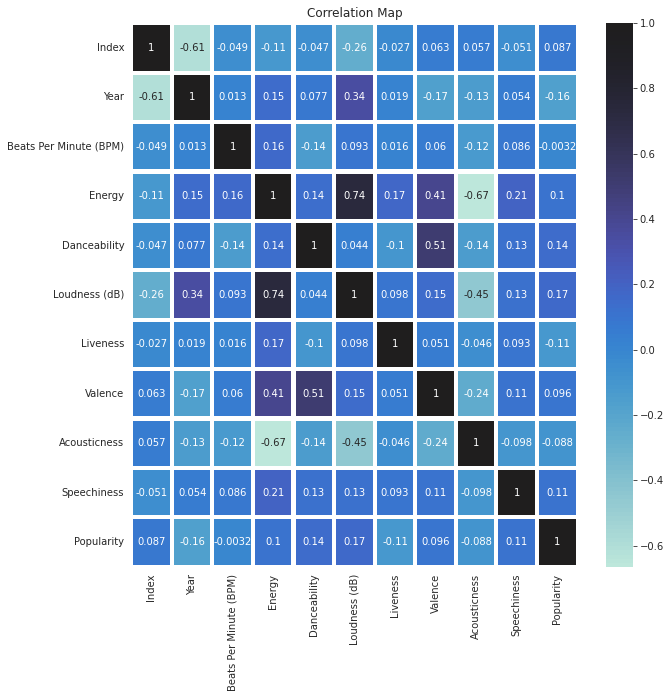

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(df.corr(),
               linewidth=3.1,
               annot=True,
               center=1)

Text(0, 0.5, 'COUNT')

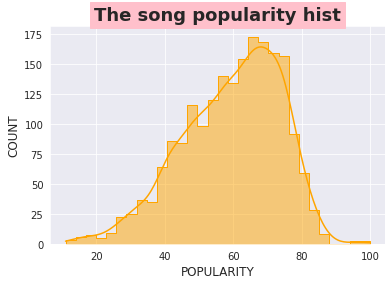

In [ ]:
import seaborn as sns
import random as rd
import plotly.express as px

sns.histplot(df['Popularity'], kde = True, element = 'step', bins = 30, color = 'orange')
sns.set_style('darkgrid')

plt.title('The song popularity hist', fontsize = 18, fontweight = 'bold', backgroundcolor = 'pink')
plt.xlabel('POPULARITY', fontsize = 12)
plt.ylabel('COUNT', fontsize = 12)

<Figure size 864x864 with 0 Axes>

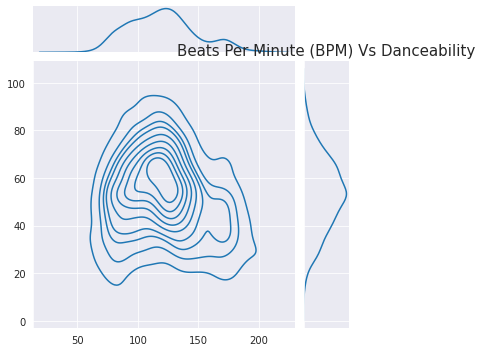

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df["Beats Per Minute (BPM)"].values, y=df['Danceability'].values, height=5, kind="kde",)
plt.ylabel('Danceability', fontsize=12)
plt.xlabel("Beats Per Minute (BPM)", fontsize=12)
plt.title("Beats Per Minute (BPM) Vs Danceability", fontsize=15)
plt.show();

<Figure size 864x864 with 0 Axes>

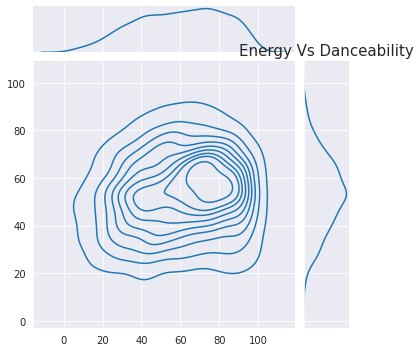

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df["Energy"].values, y=df['Danceability'].values, height=5, kind="kde",)
plt.ylabel('Danceability', fontsize=12)
plt.xlabel("Energy", fontsize=12)
plt.title("Energy Vs Danceability", fontsize=15)
plt.show();

<Figure size 864x864 with 0 Axes>

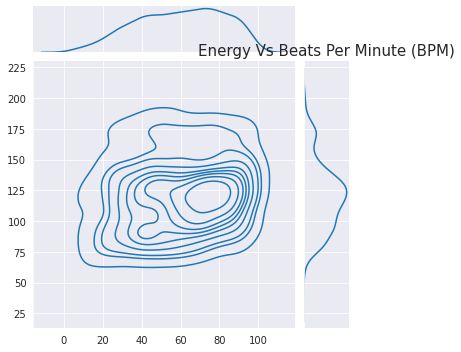

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df["Energy"].values, y=df['Beats Per Minute (BPM)'].values, height=5, kind="kde",)
plt.ylabel('Beats Per Minute (BPM)', fontsize=12)
plt.xlabel("Energy", fontsize=12)
plt.title("Energy Vs Beats Per Minute (BPM)", fontsize=15)
plt.show();